In [1]:
#Author-Vishal Burman

In [2]:
#Importing the relevant libraries

import os, shutil
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import adam

In [4]:
#Specify the base directory

base_dir="cats_and_dog_small/"

In [6]:
#Specifying the Training, Validation and Test directory

train_dir=os.path.join(base_dir, 'train')
validation_dir=os.path.join(base_dir, 'valid')
test_dir=os.path.join(base_dir, 'test')

train_cats_dir=os.path.join(train_dir, 'cats')
train_dogs_dir=os.path.join(train_dir, 'dogs')

validation_cats_dir=os.path.join(validation_dir, 'cats')
validation_dogs_dir=os.path.join(validation_dir, 'dogs')

test_cats_dir=os.path.join(test_dir, 'cats')
test_dogs_dir=os.path.join(test_dir, 'dogs')

In [9]:
#Setting up a Data Augmentation configuration via ImageDataGenerator

datagen=ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

In [11]:
#Displaying some randomly augmented Training images

fnames=[os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path=fnames[4]

img=image.load_img(img_path, target_size=(150, 150))
x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4==0:
        break
plt.show()

In [13]:
#Defining a new ConvNet which includes Dropout

In [14]:
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
#Compiling the above model

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
#Training the ConvNet using Data-Augmentation generators

In [18]:
train_datagen=ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

validation_generator=test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

history=model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50, workers=8)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 13s 128ms/step - loss: 0.6946 - acc: 0.5225 - val_loss: 0.7029 - val_acc: 0.4975
Epoch 2/100
100/100 [==============================] - 9s 85ms/step - loss: 0.6907 - acc: 0.5166 - val_loss: 0.6924 - val_acc: 0.5254
Epoch 3/100
100/100 [==============================] - 8s 81ms/step - loss: 0.6761 - acc: 0.5597 - val_loss: 0.6685 - val_acc: 0.5615
Epoch 4/100
100/100 [==============================] - 9s 86ms/step - loss: 0.6592 - acc: 0.5984 - val_loss: 0.6751 - val_acc: 0.6085
Epoch 5/100
100/100 [==============================] - 8s 81ms/step - loss: 0.6541 - acc: 0.6044 - val_loss: 0.6199 - val_acc: 0.6675
Epoch 6/100
100/100 [==============================] - 9s 86ms/step - loss: 0.6249 - acc: 0.6484 - val_loss: 0.6527 - val_acc: 0.6497
Epoch 7/100
100/100 [==============================] - 9s 86ms/step - loss: 0.6282 - acc: 0.6428 - val_loss: 0

100/100 [==============================] - 9s 91ms/step - loss: 0.2806 - acc: 0.8787 - val_loss: 0.4610 - val_acc: 0.8344
Epoch 62/100
100/100 [==============================] - 9s 88ms/step - loss: 0.2844 - acc: 0.8819 - val_loss: 0.4740 - val_acc: 0.8274
Epoch 63/100
100/100 [==============================] - 9s 87ms/step - loss: 0.2907 - acc: 0.8756 - val_loss: 0.4697 - val_acc: 0.8312
Epoch 64/100
100/100 [==============================] - 8s 84ms/step - loss: 0.2822 - acc: 0.8772 - val_loss: 0.3980 - val_acc: 0.8331
Epoch 65/100
100/100 [==============================] - 9s 88ms/step - loss: 0.2702 - acc: 0.8869 - val_loss: 0.4649 - val_acc: 0.7989
Epoch 66/100
100/100 [==============================] - 8s 84ms/step - loss: 0.2655 - acc: 0.8835 - val_loss: 0.4648 - val_acc: 0.8299
Epoch 67/100
100/100 [==============================] - 9s 88ms/step - loss: 0.2627 - acc: 0.8841 - val_loss: 0.4577 - val_acc: 0.8344
Epoch 68/100
100/100 [==============================] - 9s 87ms/step

In [19]:
#Saving the model

In [20]:
model.save("CatsVsDogs_2.h5")

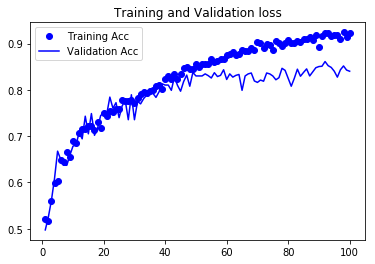

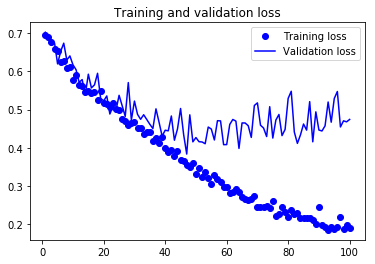

In [21]:
#Displaying the curves of loss and accuracy during training

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation loss')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
"""

The above Data Augmentation Techniques does reduce overfitting to a certain extent. Although the graph plateaus
after certain time it didn't worsened.

"""